In [14]:
import sys
!{sys.executable} -m pip install pandas==1.2.3

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [77]:
import bz2
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
with bz2.open('09_prepared.pkl.bz2', 'rb') as f:
    df = pickle.load(f)

In [78]:
with bz2.open('10_prepared.pkl.bz2', 'rb') as f:
    df2 = pickle.load(f)

In [79]:
with bz2.open('11_prepared.pkl.bz2', 'rb') as f:
    df3 = pickle.load(f)

In [81]:
df = pd.concat([df, df2, df3])

In [82]:
df.sort_values(['quantity'], ascending=False)

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
6835683,2020-10-05 11:57:52,60FE36D4-E906-EB11-B444-005056A7539A,0,5936420,1113,-9999,5000.000,0.00,False,1103443,8871720
14944711,2020-10-11 20:04:22,3EF14839-E40B-EB11-B444-005056A7539A,0,5276031,1113,-9999,5000.000,0.00,False,978352,5755792
38497419,2020-11-25 21:43:15,DC102B53-4E2F-EB11-B444-005056A7539A,0,1697303,1113,-9999,5000.000,0.00,False,310185,20130973
27314850,2020-09-20 17:55:14,76C1A889-51FB-EA11-B444-005056A7539A,0,0481876,1113,-9999,5000.000,0.00,False,95782,10865027
7510528,2020-11-05 11:43:46,62FCD9D1-441F-EB11-B444-005056A7539A,0,1540431,1113,-9999,5000.000,0.00,False,283255,9054327
...,...,...,...,...,...,...,...,...,...,...,...
5328566,2020-09-04 08:40:42,F30A7366-71EE-EA11-B444-005056A7539A,0,4039719,23074,19269,-2.154,799.13,False,718534,22233004
4498436,2020-09-04 08:48:22,8EAB9296-72EE-EA11-B444-005056A7539A,0,4176812,23074,19269,-2.288,848.85,False,748956,13052513
4218022,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,-2.375,881.13,False,126995,16694740
5376952,2020-09-04 08:37:59,0F874EE9-70EE-EA11-B444-005056A7539A,0,0504982,23074,19269,-2.616,970.54,False,100408,1420209


## Сумма покупок в чеке, для каждого чека

In [83]:
check_sum = df[['id_doc_int', 'sum']].groupby(['id_doc_int']).sum()

In [84]:
check_sum.sort_values(['sum'], ascending=False).head(10)

,sum
id_doc_int,
21745256,80405.0
7873674,66732.0
5311106,49848.0
14218897,48005.0
15327274,39650.0
10640662,38429.0
3121608,33860.0
2823436,32530.0
21204490,29063.8


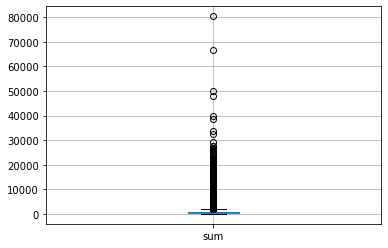

In [85]:
check_sum.boxplot()

In [91]:
check_sum['sum'].describe().apply(lambda x: format(x, 'f'))

count    23417869.000000
mean          670.390031
std           723.332752
min             0.000000
25%           220.320000
50%           443.800000
75%           853.000000
max         80405.000000
Name: sum, dtype: object

Outliers

In [93]:
check_sum[check_sum['sum'] > 10000]

,sum
id_doc_int,
5699,10651.10
10325,10079.20
40121,10519.87
50019,11559.38
52061,12022.29
...,...
23346466,20971.46
23351305,10858.00
23371738,12023.75


In [165]:
outliers_1 = check_sum[check_sum['sum'] > 10000]

In [168]:
pd.merge(df[["id_doc_int","id_card_int"]], outliers_1, on="id_doc_int").drop_duplicates()

,id_doc_int,id_card_int,sum
0,2971806,689441,10608.21
53,5173860,228892,10985.14
76,6496131,1926393,10894.19
135,22804787,1211543,10549.57
182,502916,17398,10162.09
...,...,...,...
119144,20743766,1759968,10710.47
119198,3464676,1877362,10003.37
119248,21773512,108205,11924.98
119310,16027818,1142191,15093.95


если чек был на необычно большую сумму, скорее всего это не нормальное поведение

In [169]:
outliers_1 = pd.merge(df[["id_doc_int","id_card_int"]], outliers_1, on="id_doc_int").drop_duplicates()

## Сумма всех покупок покупателем за месяц

In [94]:
customers_sum = df[['id_card_int', 'sum']].groupby(['id_card_int']).sum()

In [95]:
customers_sum.sort_values(['sum'], ascending=False)

,sum
id_card_int,
883386,60016231.51
1577248,1279932.55
568930,379927.61
1028081,292730.00
497966,284392.33
...,...
849914,0.00
1801523,0.00
1380493,0.00


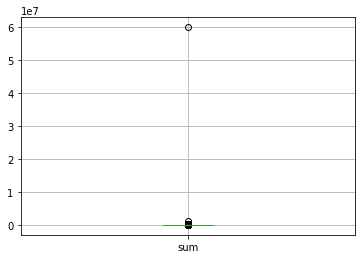

In [96]:
customers_sum.boxplot()

In [97]:
customers_sum['sum'].describe().apply(lambda x: format(x, 'f'))

count     1944075.000000
mean         8075.360227
std         45281.230204
min             0.000000
25%           728.940000
50%          2495.560000
75%          8917.000000
max      60016231.510000
Name: sum, dtype: object

Outliers

In [103]:
customers_sum[customers_sum['sum'] > 115000]

,sum
id_card_int,
19,209335.94
200,121199.31
852,136460.47
893,148539.30
1009,126813.49
...,...
1906623,179686.12
1907437,130822.76
1910071,115023.19


если кто-то делает очень много покупок за месяц, скорее всего это аутлаер

In [109]:
outliers_2 = customers_sum[customers_sum['sum'] > 115000]

## Сумма максимального количества товаров в чеке

In [104]:
max_quantity_sum = df[['id_doc_int', 'quantity', 'id_card_int']].groupby(['id_doc_int']).max()

In [105]:
max_quantity_sum = max_quantity_sum[['quantity', 'id_card_int']].groupby(['id_card_int']).sum()

In [106]:
max_quantity_sum.sort_values(['quantity'], ascending=False)

,quantity
id_card_int,
883386,478079.870
133,154950.961
978368,135204.884
1154256,123046.113
1000162,115031.908
...,...
83280,0.050
893139,0.050
753720,0.044


In [107]:
max_quantity_sum['quantity'].describe().apply(lambda x: format(x, 'f'))

count    1944075.000000
mean          38.425986
std          647.072641
min            0.025000
25%            2.000000
50%            7.338000
75%           24.590000
max       478079.870000
Name: quantity, dtype: object

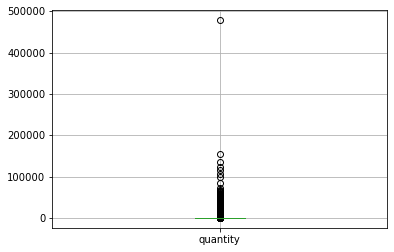

In [110]:
max_quantity_sum.boxplot()

Outliers

In [117]:
max_quantity_sum[max_quantity_sum['quantity'] > 4000]

,quantity
id_card_int,
32,12023.013
35,5042.519
49,4141.579
51,17222.117
56,14621.580
...,...
1898363,24427.142
1898387,4007.000
1900983,7023.986


если кто-то покупает очень много товаров определенного вида, скорее всего он аутлаер

In [118]:
outliers_3 = max_quantity_sum[max_quantity_sum['quantity'] > 4000]

## Количество дней закупки в месяц на каждого покупателя

In [120]:
df['day'] = df['date'].dt.date

In [121]:
card_unique_days = df.groupby(['id_card_int'])['day'].nunique()

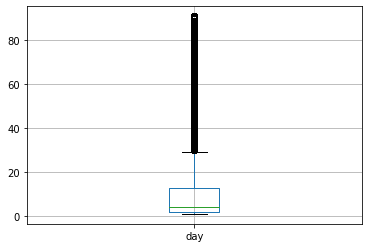

In [122]:
pd.DataFrame(card_unique_days).boxplot()

In [133]:
card_unique_days[card_unique_days['day'] > 15]['day'].describe().apply(lambda x: format(x, 'f'))

count    428112.000000
mean         32.228732
std          15.363783
min          16.000000
25%          20.000000
50%          27.000000
75%          40.000000
max          91.000000
Name: day, dtype: object

Outliers

In [135]:
card_unique_days = pd.DataFrame(card_unique_days)
card_unique_days[card_unique_days['day'] > 50]

,day
id_card_int,
19,69
36,66
42,72
51,73
56,60
...,...
1925454,69
1925880,60
1928357,52


если кто-то закупается очень часто в течении месяца, скорее всего это аутлаер, так как обычный человек скорее купит еды надолго

In [134]:
outliers_4 = card_unique_days[card_unique_days['day'] > 30]

## Cредння сумма покупок в месяц 

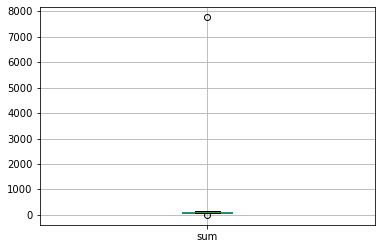

In [137]:
quantity_mean = df[['id_card_int', 'sum']].groupby('id_card_int').mean()
quantity_mean.describe().drop('count').boxplot()

In [141]:
quantity_mean[quantity_mean['sum'] > 800]

,sum
id_card_int,
4741,2244.000000
6216,1200.000000
7589,828.287627
8750,811.080000
18462,1375.333333
...,...
1942918,2115.000000
1943084,816.000000
1943232,1615.000000


средняя сумма покупок в месяц у аутлаеров превышает нормальные пороги, естественные для нормальных покупателей

In [142]:
outliers_5 = quantity_mean[quantity_mean['sum'] > 800]

## По количеству товаров в месяц

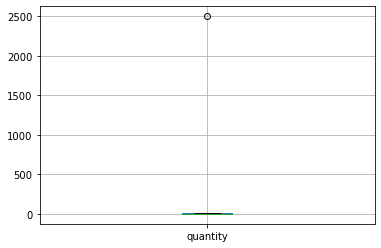

In [143]:
quantity_mean = df[['id_card_int' ,'quantity']].groupby('id_card_int').mean()
quantity_mean.describe().drop('count').boxplot()

In [221]:
quantity_mean[quantity_mean['quantity'] > 30]

,quantity
id_card_int,
32,218.992909
35,36.728493
49,33.514714
56,47.589205
75,68.721150
...,...
1898428,38.940228
1900793,34.333333
1900983,100.984643


Аутлаеры стремятся больше покупать товаров в месяц, что не соотносится с реальными покупками людей

In [155]:
outliers_6 = quantity_mean[quantity_mean['quantity'] > 30]

## Result candidates

In [205]:
candidates = [outliers_1["id_card_int"].values, 
             outliers_2.index.values,
             outliers_3.index.values,
             outliers_4.index.values,
             outliers_5.index.values,
             outliers_6.index.values]

In [212]:
len(set.union(*list(map(set, candidates))))

185675

In [213]:
result = set.union(*list(map(set, candidates)))

In [218]:
result_df = pd.DataFrame(result, columns=['id_card_int'])

In [220]:
with bz2.open('bad_ids.pkl.bz2', 'wb') as f:
    pickle.dump(result_df, f, protocol=4)